In [5]:
!pip install selenium

In [6]:
!pip install plotly

In [7]:
!pip install wordcloud

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("phishing_site_urls.csv");

In [9]:
data.shape

(549346, 2)

In [10]:
data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


<h2><u>ABOUT DATA</h2>
1.There are 549,346 unique entries in the data<br>
2.There are two columns<br>
3.The label column is prediction column which has 2 categories:<br>
    good - means the URL is not containing malicious stuff and is not a phising site's URL.<br>
    bad - means the URL contains some malicious stuff and is a phising site's URL

In [12]:
data.isnull().sum()

URL      0
Label    0
dtype: int64

This shows that the dataset contains no null values

In [13]:
label_counts = pd.DataFrame(data.Label.value_counts())
label_counts

,Label
good,392924
bad,156422


<AxesSubplot:ylabel='Label'>

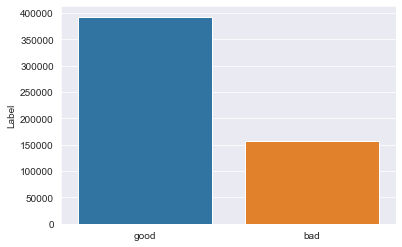

In [14]:
sns.set_style('darkgrid')
sns.barplot(label_counts.index,label_counts.Label)

<h1><u>PREPROCESSING</h1>

In [15]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [16]:
data.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [17]:
tokenizer.tokenize(data.URL[0])

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [18]:
print('Getting words tokenized ...')
t0= time.perf_counter()
data['text_tokenized'] = data.URL.map(lambda t: tokenizer.tokenize(t))
t1 = time.perf_counter() - t0
print('Time taken for all rows:',t1 ,'sec')

Getting words tokenized ...
Time taken for all rows: 4.689715136000018 sec


In [19]:
data.sample(5)

,URL,Label,text_tokenized
425849,rousefamily.com/rock_roots/?tag=phil-everly,good,"[rousefamily, com, rock, roots, tag, phil, eve..."
281387,ant-zen.com/act/act159.htm,good,"[ant, zen, com, act, act, htm]"
111951,karinarohde.com.br/wp-content/newdocxb/e00c3f6...,bad,"[karinarohde, com, br, wp, content, newdocxb, ..."
465313,wlio.net/index.php?m=05&y=08&d=16&entry=entry0...,good,"[wlio, net, index, php, m, y, d, entry, entry]"
368649,kingsturge.fr/,good,"[kingsturge, fr]"


In [20]:
stemmer = SnowballStemmer('english')

In [21]:
print('Getting words stemmed ...')
t0= time.perf_counter()
data['text_stemmed'] = data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 60.90651013299998 sec


In [22]:
data.sample(5)

,URL,Label,text_tokenized,text_stemmed
50302,www.hornetranslations.com/defaultenca.shtml,good,"[www, hornetranslations, com, defaultenca, shtml]","[www, hornetransl, com, defaultenca, shtml]"
515340,91.239.24.190:6892,bad,[],[]
56032,www.deas.harvard.edu/brenner/physfluid2.pdf,good,"[www, deas, harvard, edu, brenner, physfluid, ...","[www, dea, harvard, edu, brenner, physfluid, pdf]"
30456,www.luxurybrandssale.com/page/vote.php?pid=96,bad,"[www, luxurybrandssale, com, page, vote, php, ...","[www, luxurybrandssal, com, page, vote, php, pid]"
209129,local.yahoo.com/info-36124447-thomson-elementa...,good,"[local, yahoo, com, info, thomson, elementary,...","[local, yahoo, com, info, thomson, elementari,..."


In [23]:
print('Getting joiningwords ...')
t0= time.perf_counter()
data['text_sent'] = data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.34778505000002724 sec


In [24]:
data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
72176,www.simtel.net/category.php?id=73,good,"[www, simtel, net, category, php, id]","[www, simtel, net, categori, php, id]",www simtel net categori php id
290807,betweenthecovers.com/btc/item/79044/,good,"[betweenthecovers, com, btc, item]","[betweenthecov, com, btc, item]",betweenthecov com btc item
333043,facebook.com/sanjuancafe,good,"[facebook, com, sanjuancafe]","[facebook, com, sanjuancaf]",facebook com sanjuancaf
361019,importgenius.com/dir2/mo-importers.html,good,"[importgenius, com, dir, mo, importers, html]","[importgenius, com, dir, mo, import, html]",importgenius com dir mo import html
530717,myphychoice.com/qz3eppp,bad,"[myphychoice, com, qz, eppp]","[myphychoic, com, qz, eppp]",myphychoic com qz eppp


<h1>Visualization</h1>

In [25]:
#slicing classes
bad_sites = data[data.Label == 'bad']
good_sites = data[data.Label == 'good']

In [26]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [27]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [28]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'com','http'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  


In [29]:
mydata = good_sites.text_sent
mydata.reset_index(drop=True, inplace=True)

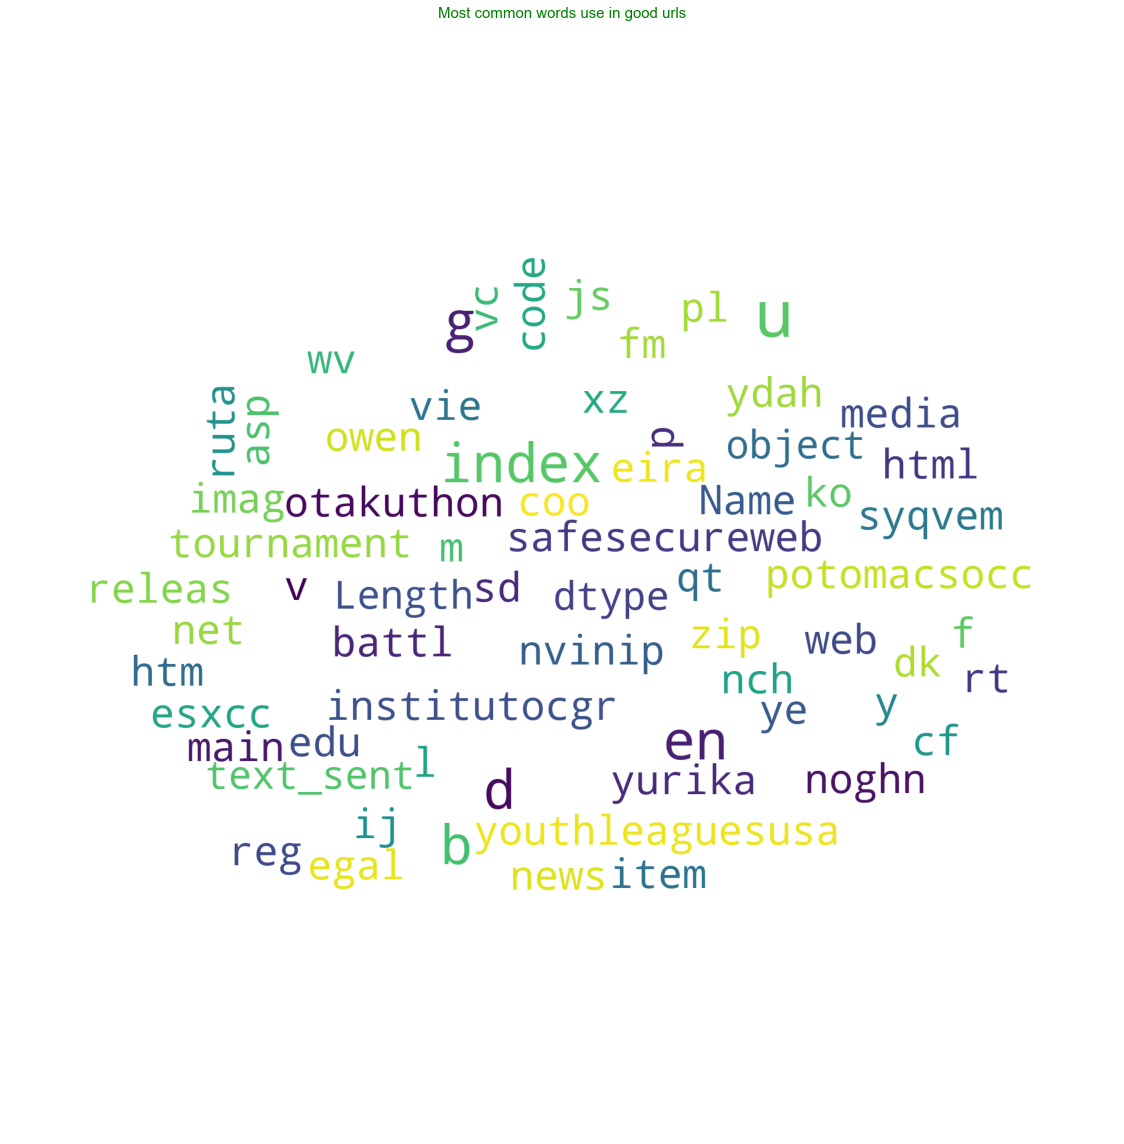

In [30]:
common_text = str(mydata)
common_mask = np.array(Image.open('comment.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title = 'Most common words use in good urls', title_size=15)

In [31]:
mydata = bad_sites.text_sent
mydata.reset_index(drop=True, inplace=True)

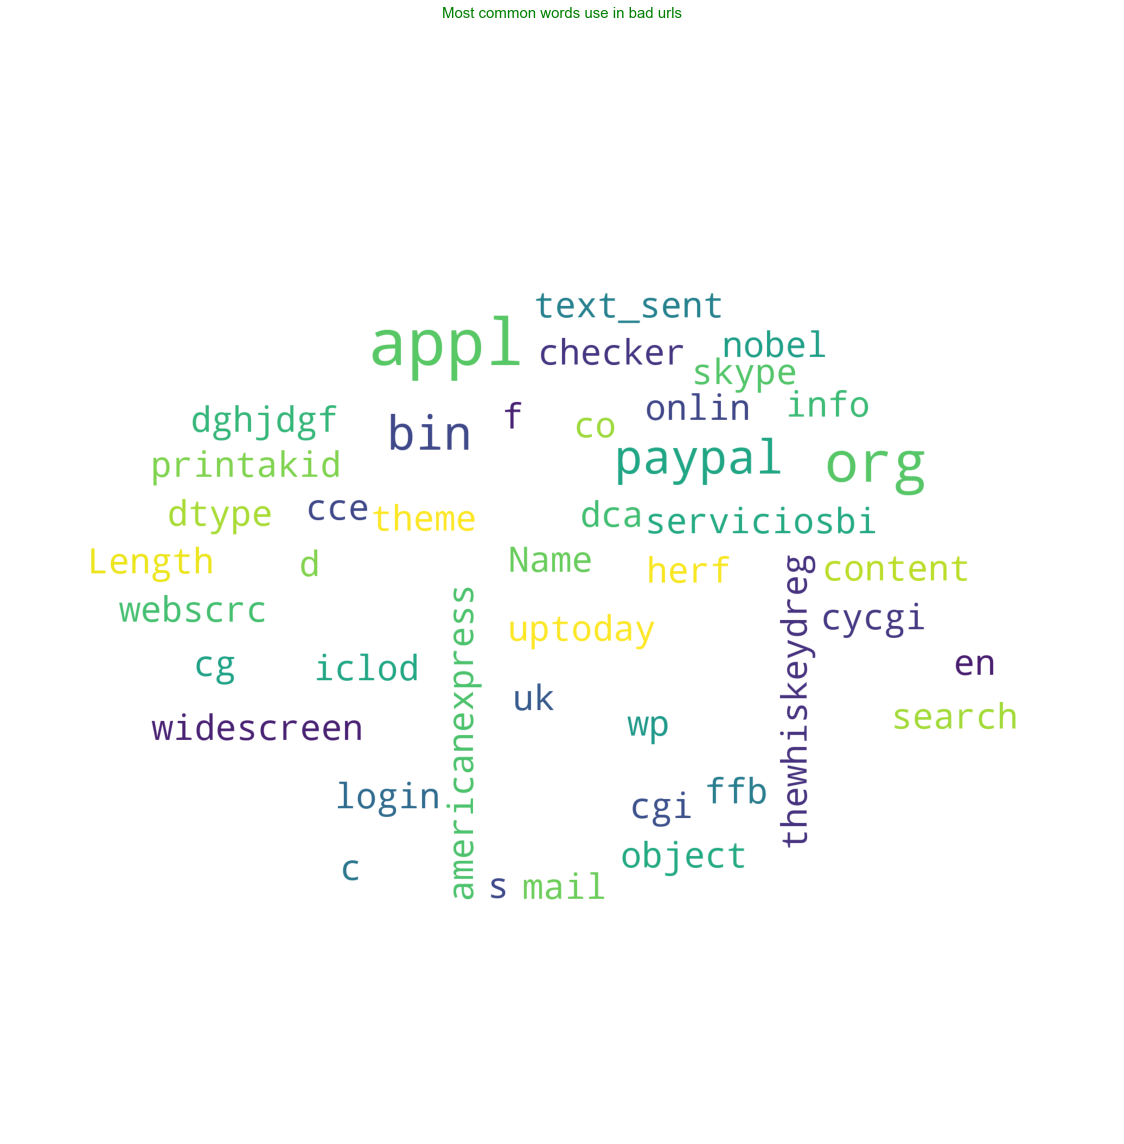

In [32]:
common_text = str(mydata)
common_mask = np.array(Image.open('comment.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title = 'Most common words use in bad urls', title_size=15)

<h1><u>Creating Models</h1>

Using countVectorizer to convert the corpora of text into vector of term counts

In [33]:
cv = CountVectorizer()

In [34]:
help(CountVectorizer())

Help on CountVectorizer in module sklearn.feature_extraction.text object:

class CountVectorizer(_VectorizerMixin, sklearn.base.BaseEstimator)
 |  CountVectorizer(*, input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.int64'>)
 |  
 |  Convert a collection of text documents to a matrix of token counts
 |  
 |  This implementation produces a sparse representation of the counts using
 |  scipy.sparse.csr_matrix.
 |  
 |  If you do not provide an a-priori dictionary and you do not use an analyzer
 |  that does some kind of feature selection then the number of features will
 |  be equal to the vocabulary size found by analyzing the data.
 |  
 |  Read more in the :ref:`User Guide <text_feature_extraction>`.
 |  
 |  Parameters
 |  -----

In [35]:
feature = cv.fit_transform(data.text_sent)

In [36]:
feature[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

<hr size="10">
<h1><u>Splitting the data</h1>

In [37]:
trainX, testX, trainY, testY = train_test_split(feature, data.Label)